In [54]:
import collections
import pathlib
import pickle

import matplotlib.pyplot as plt
import seaborn as sns
from labm8 import humanize
import numpy as np
import pandas as pd

from experimental.deeplearning.fish import train_discriminator
from experimental.deeplearning.fish.proto import fish_pb2
from labm8 import viz

In [55]:
experiments_root = pathlib.Path('~/data/experimental/deeplearning/fish').expanduser()
experiments = [
    'assertions',
    'assertions_all',
    'assertions_balanced',
    'assertions_balanced_with_bf',
    'assertions_balanced_with_bf_clipped',
    'assertions_with_bf',
    'compilable_clipped',
    'compilable_balanced_clipped',
    'crash',
]
dataset_paths = [experiments_root / d / 'dataset' for d in experiments
                 if (experiments_root / d / 'dataset').is_dir()]
print("Loading", len(dataset_paths), "of", len(experiments), "datasets")

Loading 9 of 9 datasets


In [56]:
test_protos = [train_discriminator.LoadPositiveNegativeProtos(d / 'testing')
               for d in dataset_paths]
print('Loaded protos')

Loaded protos


# Outcomes

In [57]:
for dataset_path, testing_protos in zip(dataset_paths, test_protos):
    # Extract name of parent directory.
    dataset_name = dataset_path.parent.name
    positive_outcomes = collections.Counter([p.outcome for p in testing_protos.positive])
    df = pd.DataFrame(
        [['Positive', fish_pb2.CompilerCrashDiscriminatorTrainingExample.Outcome.Name(p.outcome),
          p.raised_assertion, len(p.src)] for p in testing_protos.positive] + 
        [['Negative', fish_pb2.CompilerCrashDiscriminatorTrainingExample.Outcome.Name(p.outcome), 
          p.raised_assertion, len(p.src)] for p in testing_protos.negative],
        columns=['Class', 'Outcome', 'Assertion', 'Length'])
    outcome_counts = df.groupby(['Class', 'Outcome']).count().reset_index()[
        ['Class', 'Outcome', 'Assertion']].rename(columns={'Assertion': 'Count'})
    print(dataset_name)
    print(outcome_counts)
    print()

assertions
      Class      Outcome  Count
0  Negative         PASS    311
1  Positive  BUILD_CRASH    311

assertions_all
      Class      Outcome  Count
0  Negative         PASS   3084
1  Positive  BUILD_CRASH    311

assertions_balanced
      Class      Outcome  Count
0  Negative         PASS    311
1  Positive  BUILD_CRASH    311

assertions_balanced_with_bf
      Class        Outcome  Count
0  Negative  BUILD_FAILURE    299
1  Negative           PASS     12
2  Positive    BUILD_CRASH    311

assertions_balanced_with_bf_clipped
      Class        Outcome  Count
0  Negative  BUILD_FAILURE    246
1  Negative           PASS     16
2  Positive    BUILD_CRASH    262

assertions_with_bf
      Class      Outcome  Count
0  Negative         PASS   7309
1  Positive  BUILD_CRASH    311

compilable_clipped
      Class        Outcome  Count
0  Negative           PASS   3084
1  Positive  BUILD_FAILURE   4083

compilable_balanced_clipped
      Class        Outcome  Count
0  Negative           PAS

## Sequence Lengths

/home/linuxbrew/.linuxbrew/opt/python/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6444: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


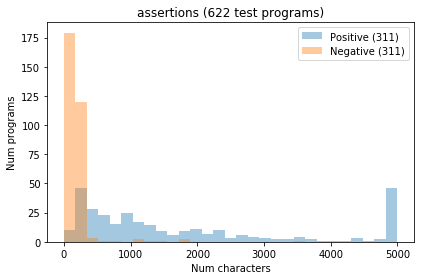

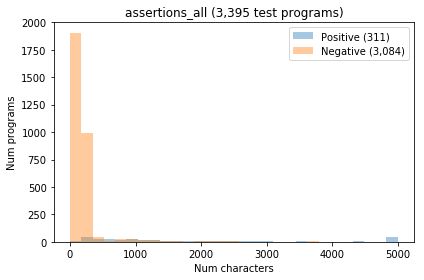

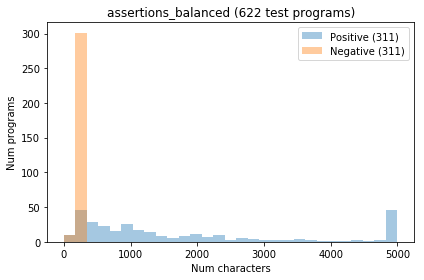

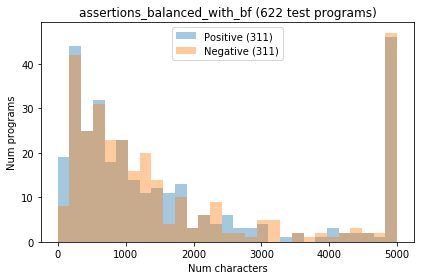

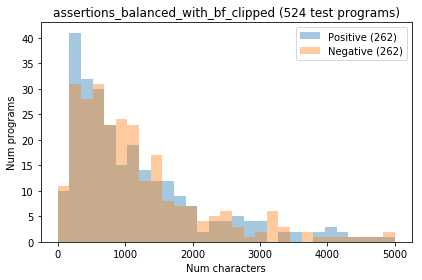

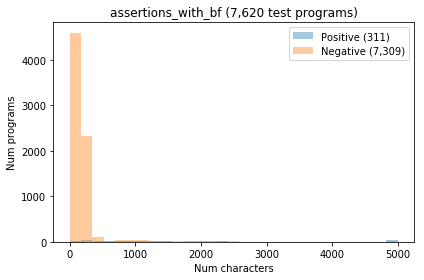

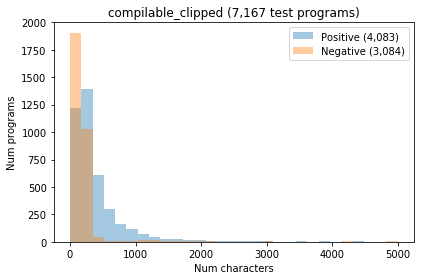

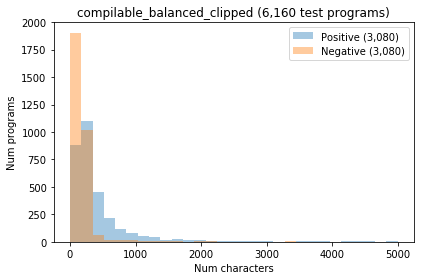

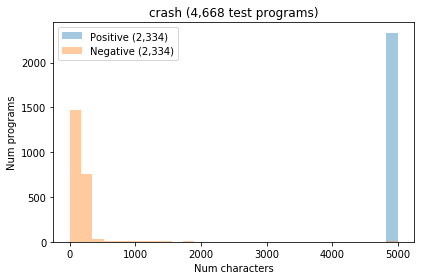

In [58]:
for dataset_path, testing_protos in zip(dataset_paths, test_protos):
    # Extract name of parent directory.
    dataset_name = dataset_path.parent.name
    positive_lengths = np.array([min(len(p.src), sequence_length) for p in testing_protos.positive])
    negative_lengths = np.array([min(len(p.src), sequence_length) for p in testing_protos.negative])
    sns.distplot(positive_lengths, bins=np.linspace(0, sequence_length, 30), kde=False,
                 label='Positive ({})'.format(humanize.Commas(len(positive_lengths))))
    sns.distplot(negative_lengths, bins=np.linspace(0, sequence_length, 30), kde=False, 
                 label='Negative ({})'.format(humanize.Commas(len(negative_lengths))))
    plt.xlabel('Num characters')
    n = humanize.Commas(len(positive_lengths) + len(negative_lengths))
    plt.ylabel(f'Num programs')
    plt.title(f'{dataset_name} ({n} test programs)')
    plt.legend()
    viz.finalise()

End of notebook.